In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("carprices.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
gas_mapping = {
    "gas" : 1,
    "diesel":2
}
df["fueltype"] = df["fueltype"].map(gas_mapping).fillna(0).astype("category")

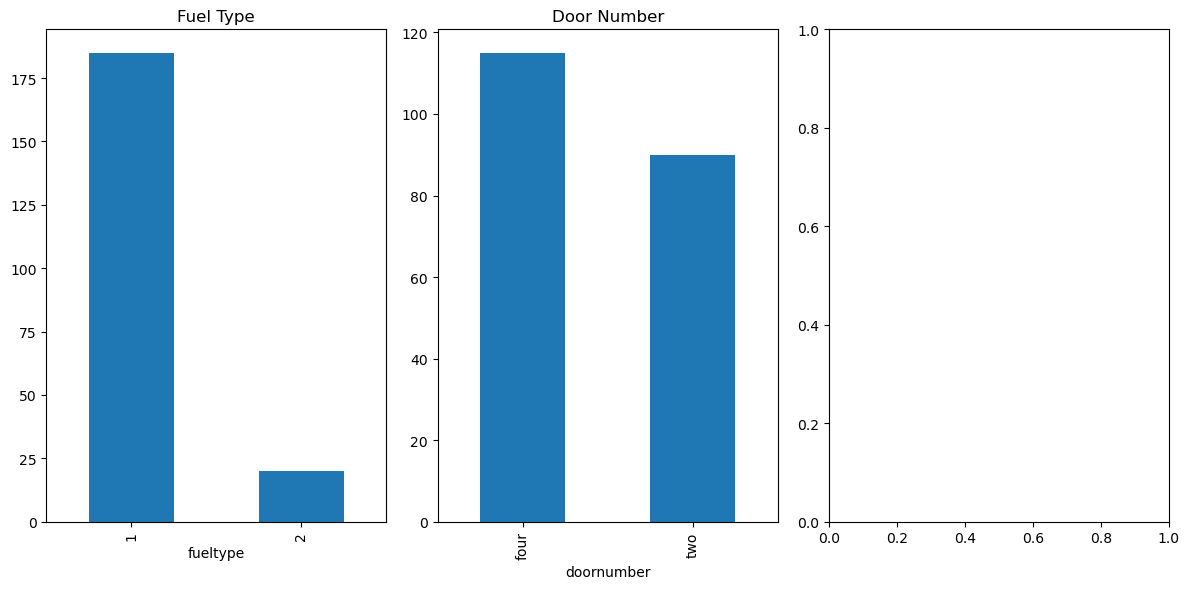

In [5]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot 'fueltype' value counts on the first subplot
df["fueltype"].value_counts().plot(kind="bar", ax=axes[0], title='Fuel Type')

# Plot 'doornumber' value counts on the second subplot
df["doornumber"].value_counts().plot(kind="bar", ax=axes[1], title='Door Number')

# Display the plots
plt.tight_layout()
plt.show()

In [6]:
# Dictionary to map door number words to corresponding integers
door_mapping = {
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5
}

# Apply the mapping to the 'doornumber' column, using 0 as the default for unmatched values
df['doornumber'] = df['doornumber'].map(door_mapping).fillna(0).astype(int)


<Axes: xlabel='doornumber'>

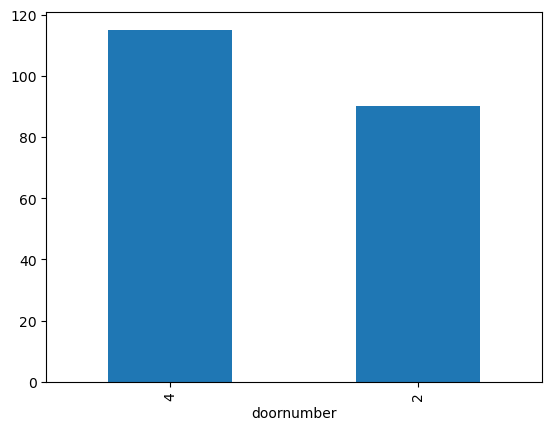

In [7]:
df["doornumber"] =df ['doornumber'].astype("category", copy=False)
df["doornumber"].value_counts().plot(kind="bar")

In [8]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Split the data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['doornumber','wheelbase','carlength','carwidth','curbweight','boreratio','horsepower']]
Y =df['price']

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=1)

## Train the model

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
lm=LinearRegression()

In [16]:
lm.fit(X_train,Y_train)

LinearRegression()

In [17]:
lm.coef_

array([ -90.8066437 ,  104.14020281, -117.62192859,  772.44409598,
          6.85036564, -382.49926875,   83.83492252])

In [18]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print (cdf)

                  Coef
doornumber  -90.806644
wheelbase   104.140203
carlength  -117.621929
carwidth    772.444096
curbweight    6.850366
boreratio  -382.499269
horsepower   83.834923


In [19]:
predictions = lm.predict(X_test)

In [20]:
predictions

array([ 6886.55002457,  5048.50668319,  6025.20813964,  5770.74996634,
        7361.04190619, 23736.24406897,  6011.39453182,  -115.47576304,
        5672.33571135, 10408.89235259, 16046.71220405, 16507.04423123,
       16923.83716334,  9988.88714082, 18455.67315141, 14479.33600309,
        8919.60814759,  7691.41840048, 18627.19947359, 12914.56330759,
       11168.41393388,  6681.04272338, 10743.65908352, 10099.96631542,
       13602.48920173,  7801.02425065, 19247.2901922 ,  6660.2105354 ,
        5988.00675107,  6704.78943239,  6533.82489835, 10997.03001232,
       25052.13771207, 11326.45904797, 18348.99405574,  6821.27272589,
       10531.53935046, 30683.32042696, 15558.19653687, 18873.87241271,
        6311.4819171 ])

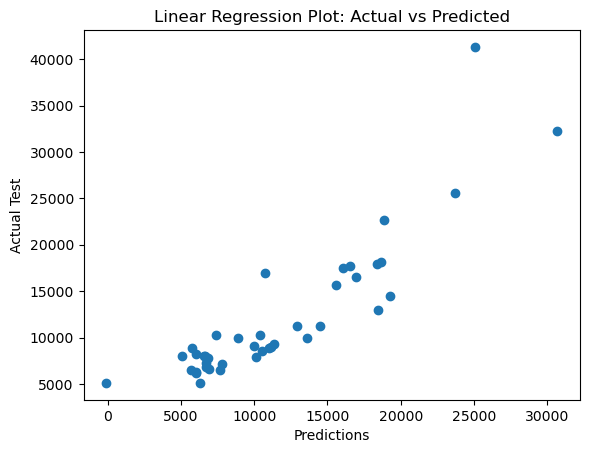

In [22]:
plt.scatter(x=predictions,y=Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual Test')
plt.title('Linear Regression Plot: Actual vs Predicted')
plt.show()